# Logistic regression on social media ads


In [38]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
data = pd.read_csv('Social_Network_Ads.csv')
data.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
132,15725660,Male,30,87000,0
69,15595324,Female,31,68000,0
241,15736228,Male,38,59000,0
398,15755018,Male,36,33000,0
177,15594577,Male,25,22000,0


In [40]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [41]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [42]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

Text(0.5, 1.0, 'Age Scatterplot')

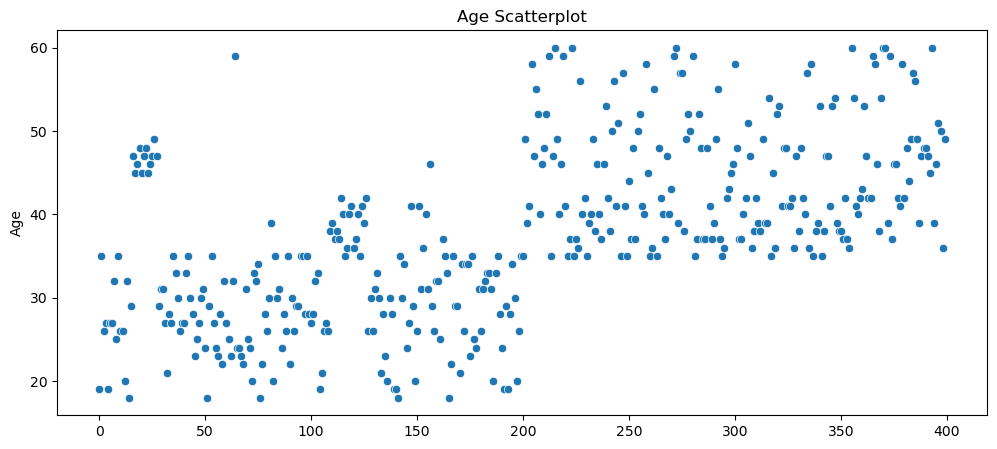

In [43]:
plt.figure(figsize = (12,5))
sns.scatterplot(data.Age)
plt.title('Age Scatterplot')


In [44]:
df_male = data[data.Gender == 'Male']
df_male

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
8,15600575,Male,25,33000,0
...,...,...,...,...,...
390,15807837,Male,48,33000,1
391,15592570,Male,47,23000,1
393,15635893,Male,60,42000,1
396,15706071,Male,51,23000,1


In [45]:
df_female = data[data.Gender == 'Female']
df_female

,User ID,Gender,Age,EstimatedSalary,Purchased
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
9,15727311,Female,35,65000,0
...,...,...,...,...,...
392,15748589,Female,45,45000,1
394,15757632,Female,39,59000,0
395,15691863,Female,46,41000,1
397,15654296,Female,50,20000,1


In [46]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

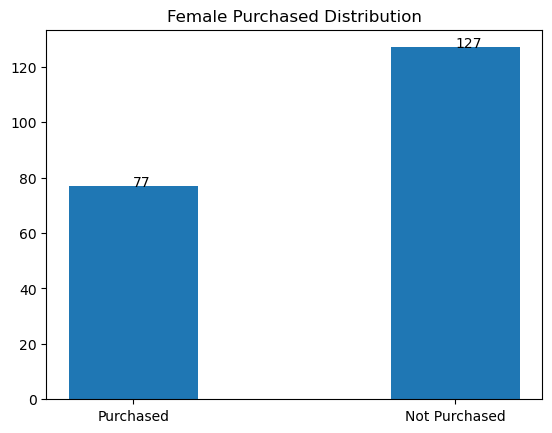

In [47]:
arr1 = ['Purchased','Not Purchased']
arr2 = [df_female[df_female['Purchased']==1].Age.count(),df_female[df_female['Purchased']==0].Age.count()]
plt.bar(arr1,arr2,width = 0.4)
plt.title('Female Purchased Distribution')
for i,value in enumerate(arr2):
    plt.text(i,value,str(value))

In [10]:
salary = pd.DataFrame({'Male_salary':[df_male.EstimatedSalary.sum(),df_male.EstimatedSalary.count(),df_male.EstimatedSalary.sum()/df_male.EstimatedSalary.count()],'Female_salary':[df_female.EstimatedSalary.sum(),df_female.EstimatedSalary.count(),df_female.EstimatedSalary.sum()/df_female.EstimatedSalary.count()]},index = ['Total_salary','Count','Avg_salary'])
salary

,Male_salary,Female_salary
Total_salary,1.325800e+07,1.463900e+07
Count,1.960000e+02,2.040000e+02
Avg_salary,6.764286e+04,7.175980e+04


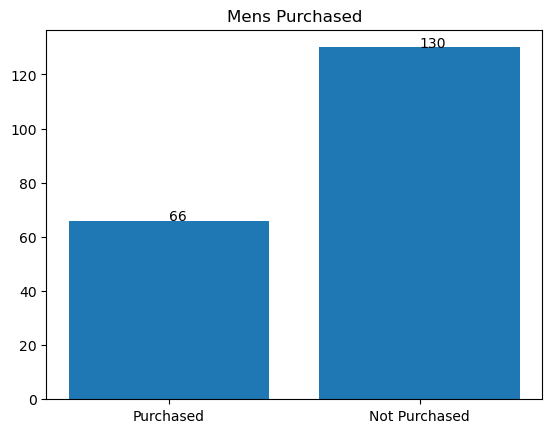

In [48]:
arr3 = [df_male[df_male.Purchased == 1].Age.count(),df_male[df_male.Purchased ==0].Age.count()]
plt.bar(arr1,arr3)
plt.title('Mens Purchased')

for i,value in enumerate(arr3):
    plt.text(i,value,str(value))

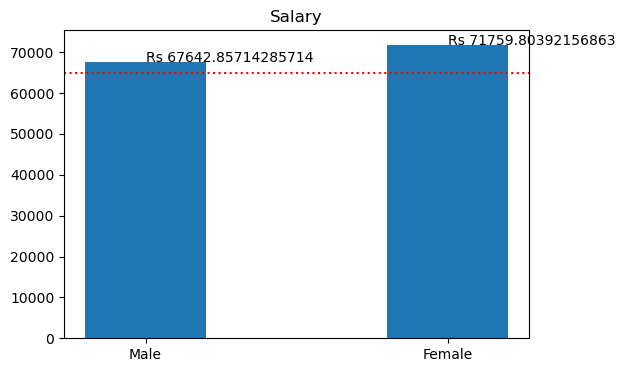

In [77]:
plt.figure(figsize= (6,4))
plt.bar(data.Gender.unique(),[salary.iloc[2,0],salary.iloc[2,1]],width = 0.4)
for i, value in enumerate([salary.iloc[2,0],salary.iloc[2,1]]):
    plt.text(i,value,'Rs '+str(value))
plt.title('Salary')
plt.axhline(65000, color='red', ls='dotted')

Text(0.5, 1.0, 'Age distribution')

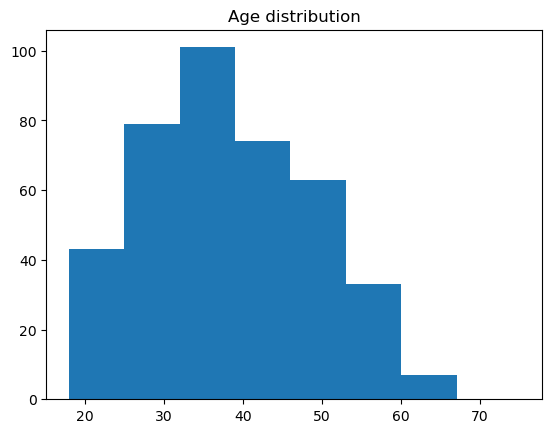

In [50]:
plt.hist(data.Age,bins = [18,25,32,39,46,53,60,67,75])
plt.title('Age distribution')

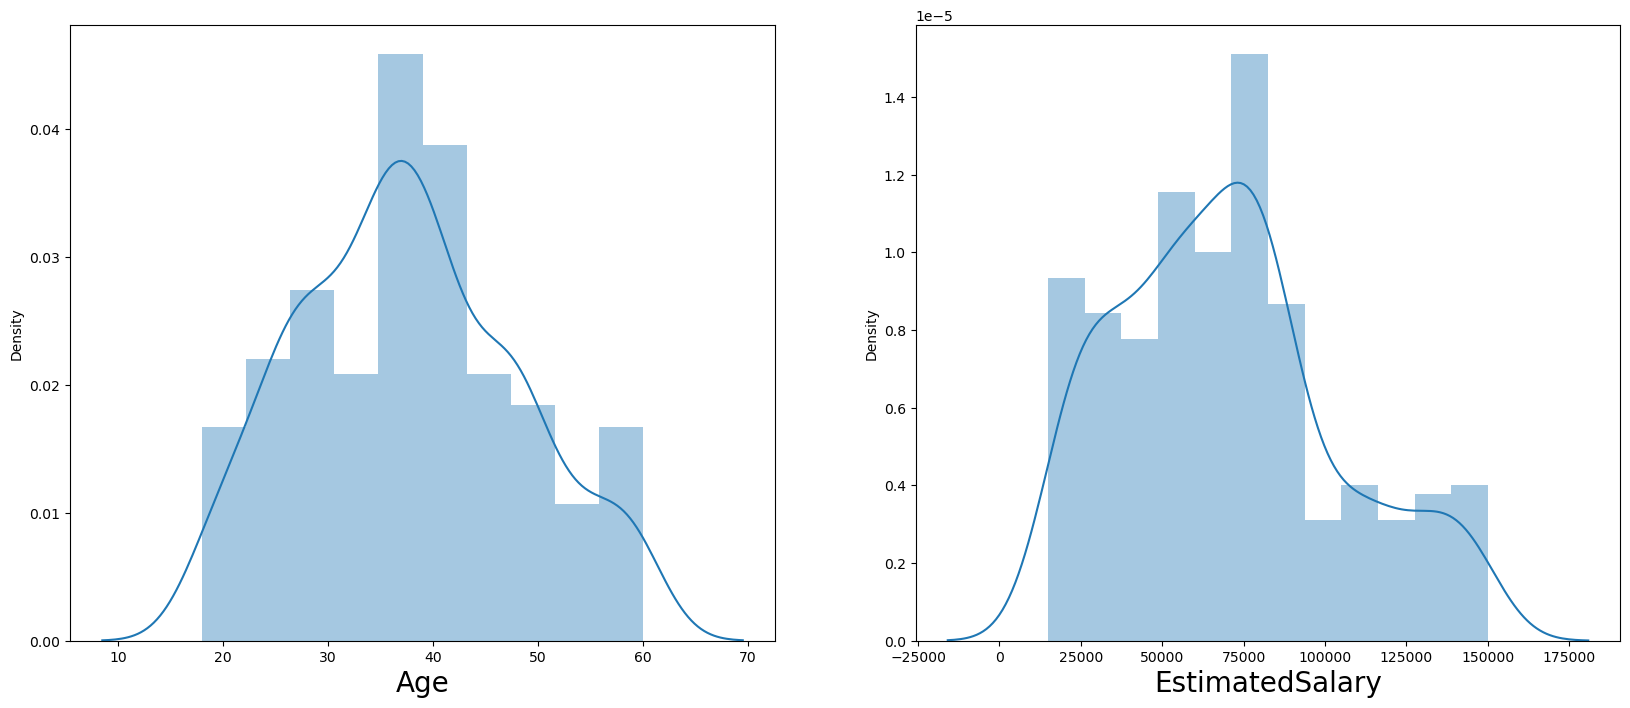

In [51]:
plt.figure(figsize = (20,8))
pltno = 1

for cols in ['Age','EstimatedSalary']:
    if pltno<=2:
        ax = plt.subplot(1,2,pltno)
        sns.distplot(data[cols])
        plt.xlabel(cols,fontsize = 20)
    pltno+=1
plt.show()

<Axes: >

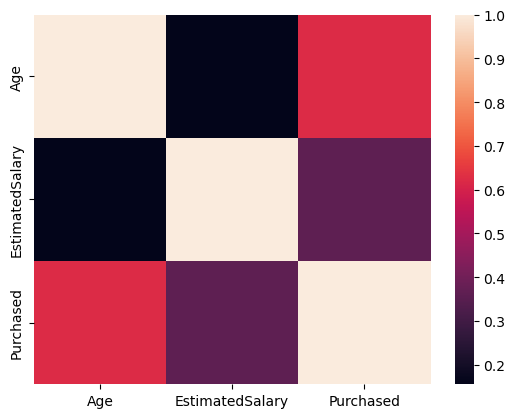

In [53]:
sns.heatmap(data.iloc[:,1:].corr())

In [54]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [55]:
X = data.iloc[:,1:4]
y = data.iloc[:,4]

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=100)

In [57]:
X_train

,Gender,Age,EstimatedSalary
234,Female,38,112000
45,Male,23,20000
171,Male,34,115000
47,Female,27,54000
265,Female,42,108000
...,...,...,...
343,Female,47,51000
359,Male,42,54000
323,Female,48,30000
280,Female,59,88000


In [58]:
y_train

234    0
45     0
171    0
47     0
265    1
      ..
343    1
359    0
323    1
280    1
8      0
Name: Purchased, Length: 280, dtype: int64

In [59]:
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(
                [('ohe',OneHotEncoder(sparse = False,drop ='first'),['Gender']),
                ('scaler',StandardScaler(),['Age','EstimatedSalary'])],remainder = 'passthrough'
)

In [60]:
X_train_new = transformer.fit_transform(X_train)
X_test_new = transformer.transform(X_test)

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [62]:
lr.fit(X_train_new,y_train)

LogisticRegression()

In [63]:
y_pred = lr.predict(X_test_new)

In [64]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)

In [65]:
accuracy

0.8333333333333334

In [67]:
# lets see accuracy using cross validation technique
X = transformer.fit_transform(X)
# y = transformer.transform(y)
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr,X,y,cv = 5)

In [68]:
score

array([0.7   , 0.95  , 0.925 , 0.8125, 0.7125])

In [69]:
mean_score = score.mean()

In [70]:
mean_score

0.8200000000000001